In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
np.random.seed(24)

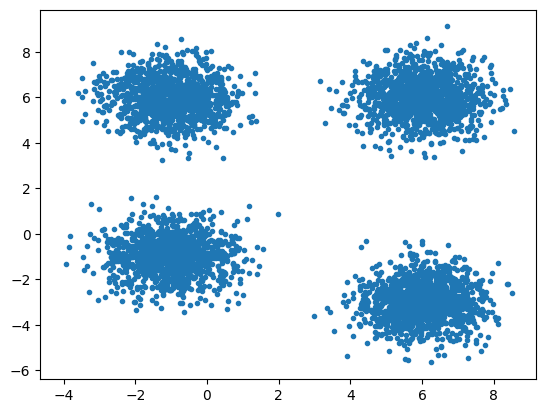

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 5000,centers = [[6,6],[-1,-1],[6,-3],[-1,6]],cluster_std = 0.85)
plt.scatter(X[:,0],X[:,1],marker = '.')

In [8]:
y

array([2, 0, 1, ..., 2, 1, 3])

In [7]:
k_means = KMeans(n_clusters = 4, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [12]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 1, 0, ..., 2, 0, 3], dtype=int32)

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.00577696, -0.96951256],
       [ 6.01271555,  5.98862282],
       [ 6.00383273, -2.98804641],
       [-1.0058333 ,  5.96516759]])

<ipython-input-18-1d20c2171163>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor = col, marker = '.')


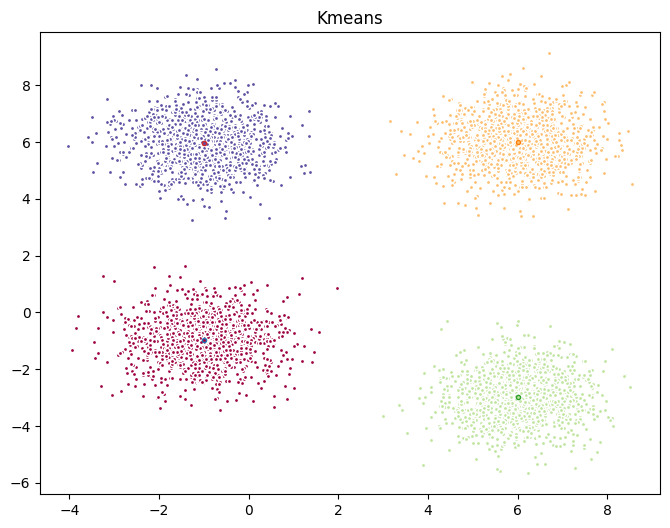

In [18]:
fig = plt.figure(figsize = (8,6))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len([[-1.00577696, -0.96951256],[ 6.01271555,  5.98862282],[ 6.00383273, -2.98804641],[-1.0058333 ,  5.96516759]])),colors):
  memberpoints = (k_means_labels == k)
  cluster_center = k_means_cluster_centers[k]
  ax.plot(X[memberpoints,0],X[memberpoints,1],'w',markerfacecolor = col, marker = '.')
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor = col, marker = '.')
ax.set_title("Kmeans")
plt.show()

In [20]:
import os
import pandas as pd

In [21]:
cus_df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Datascience-Batch-22/main/27.%20Clustering%2030-03-2024%20%26%2031-03-2024/data/Cust_Segmentation.csv")

In [22]:
cus_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [23]:
cus_df = cus_df.drop(columns = ['Customer Id','Address'])

In [24]:
cus_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [25]:
from sklearn.preprocessing import StandardScaler
X = cus_df.values[:,:]
X = np.nan_to_num(X)
Cluster_data = StandardScaler().fit_transform(X)
Cluster_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [27]:
NoClus = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in NoClus]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

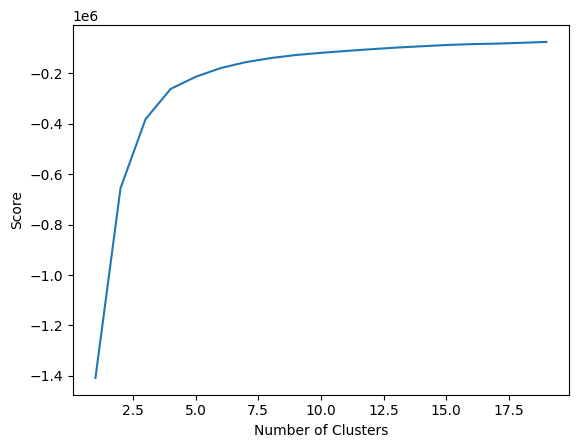

In [28]:
plt.plot(NoClus,score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

In [32]:
clusterNum = 3
k_means = KMeans(init = 'k-means++',n_clusters=clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [52]:
k_means.cluster_centers_

array([[3.29645609e+01, 1.61479199e+00, 6.37442219e+00, 3.11648690e+01,
        1.03254083e+00, 2.10413251e+00, 2.37288136e-01, 1.00947612e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00],
       [4.13333333e+01, 1.95628415e+00, 1.52568306e+01, 8.39289617e+01,
        3.10363934e+00, 5.76527869e+00, 1.36612022e-01, 1.07245902e+01]])

In [33]:
cus_df['LabelsKMEANs'] = labels

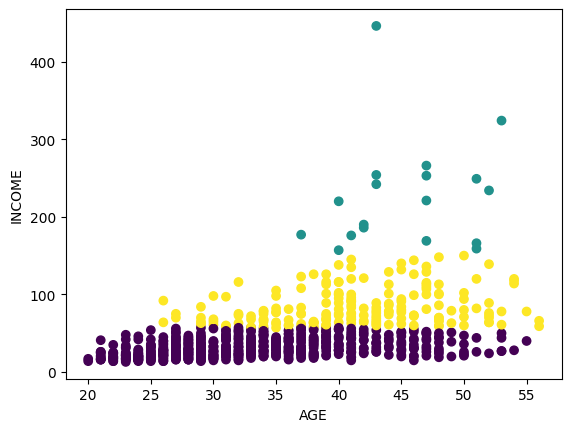

In [48]:
plt.scatter(X[:,0],X[:,3], c = labels.astype(np.float64))
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.show()

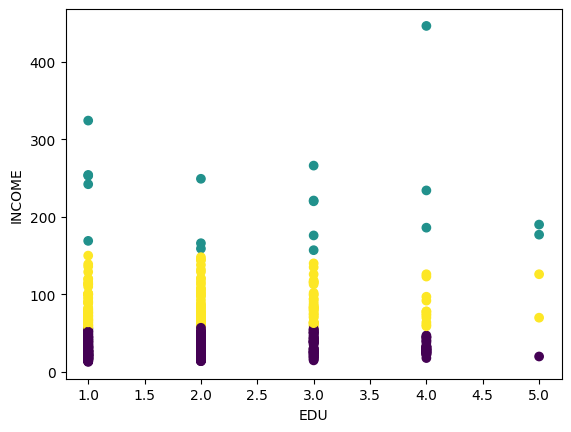

In [51]:
plt.scatter(X[:,1],X[:,3], c = labels.astype(np.float64))
plt.xlabel("EDU")
plt.ylabel("INCOME")
plt.show()

In [37]:
cus_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,LabelsKMEANs
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8,0
846,28,2,7,34,0.359,2.021,0.0,7.0,0
847,25,4,0,18,2.802,3.210,1.0,33.4,0
848,32,1,12,28,0.116,0.696,0.0,2.9,0


In [43]:
from mpl_toolkits.mplot3d import Axes3D

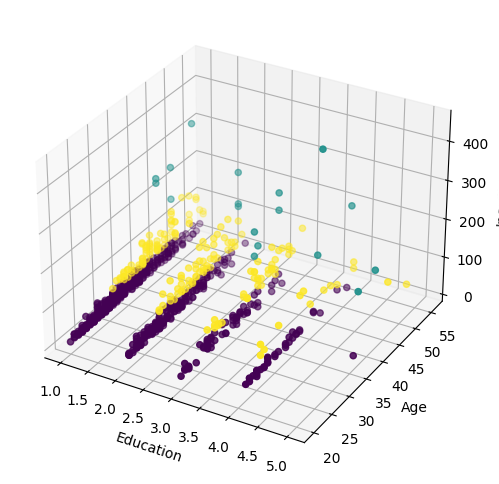

In [56]:
fig = plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,rect = [0,0,0.95,1],elev = 48,azim = 134)

#plt.cla()
ax = plt.axes(projection= '3d')
ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
ax.scatter(X[:,1],X[:,0],X[:,3],c = labels.astype(np.float64))

In [57]:
malldataset = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Datascience-Batch-22/main/27.%20Clustering%2030-03-2024%20%26%2031-03-2024/data/MallCustomers.csv")

In [58]:
malldataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
malldataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
malldataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


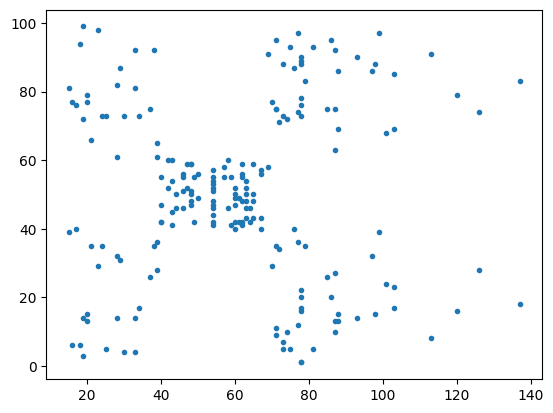

In [61]:
#from sklearn.datasets import make_blobs
plt.scatter(malldataset["Annual Income (k$)"],malldataset["Spending Score (1-100)"],marker = '.')

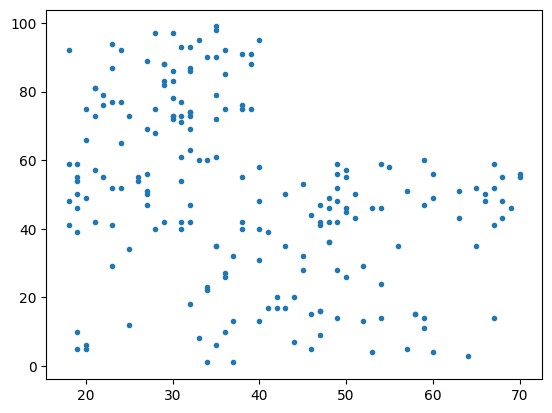

In [64]:
#from sklearn.datasets import make_blobs
plt.scatter(malldataset["Age"],malldataset["Spending Score (1-100)"],marker = '.')

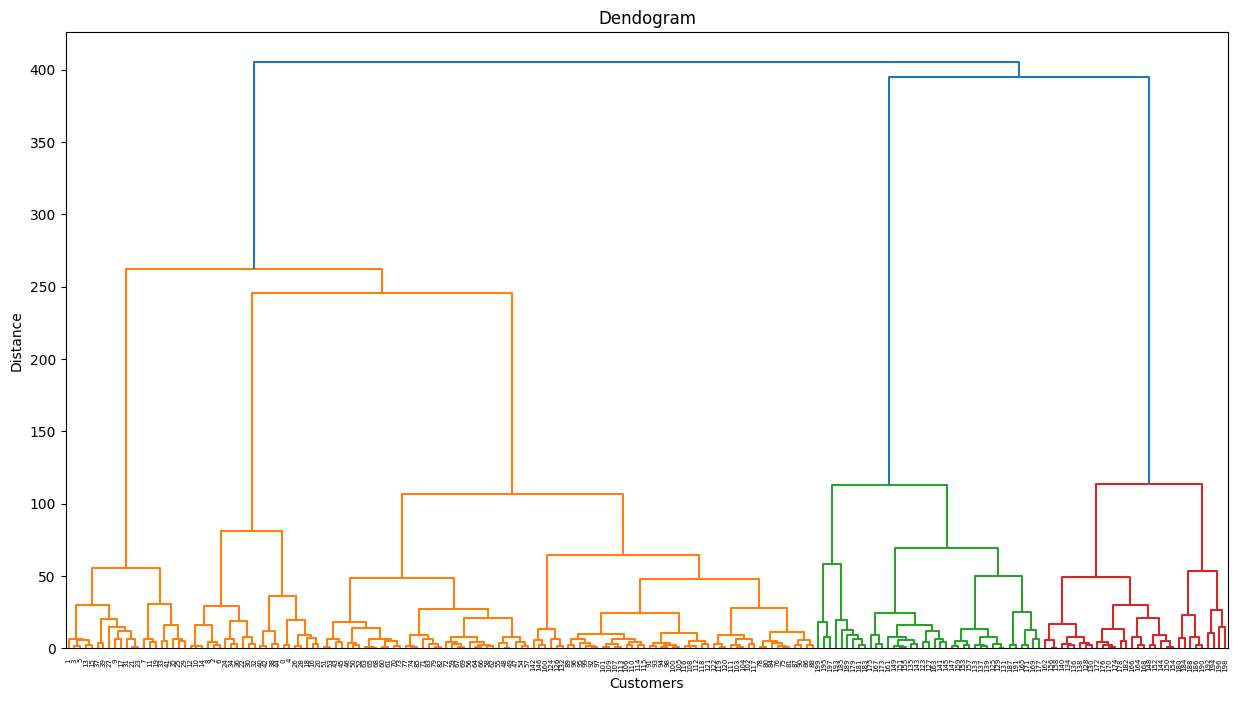

In [67]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (15,8))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")

X = malldataset.iloc[:,[3,4]].values
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.show()

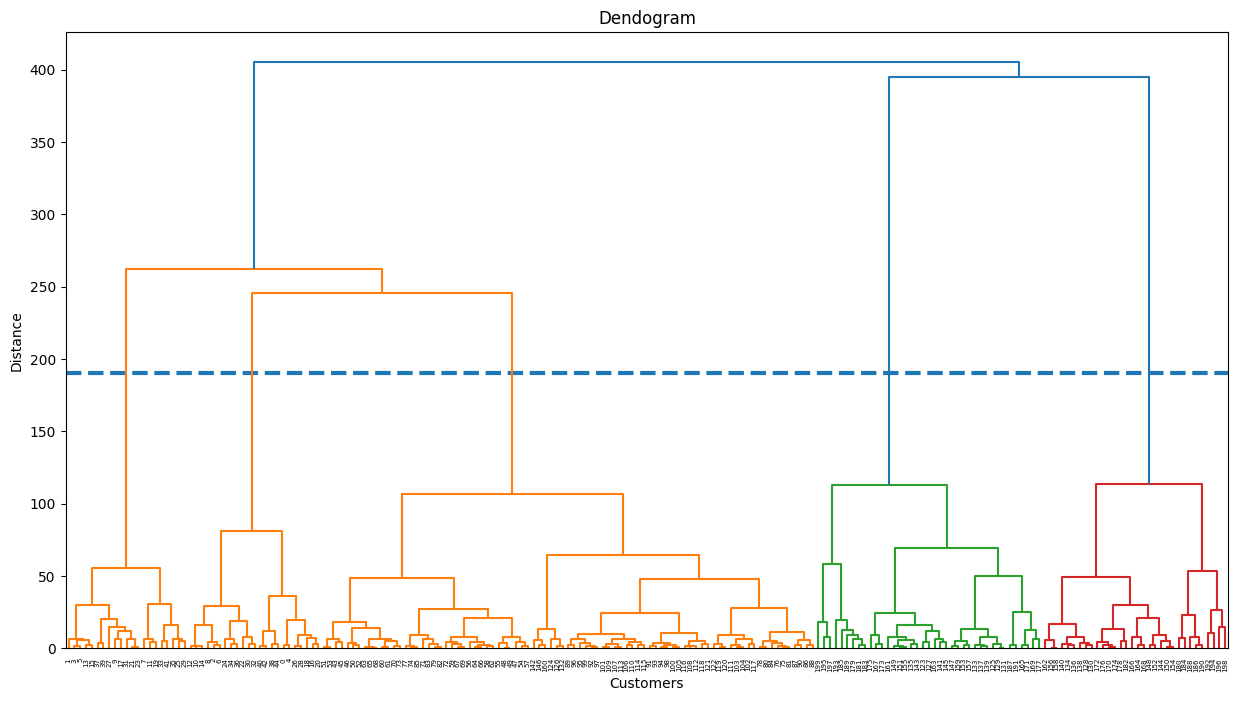

In [68]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (15,8))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")

plt.hlines(y = 190, xmin = 0,xmax = 2000, lw = 3, linestyle = '--')
X = malldataset.iloc[:,[3,4]].values
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering
hs = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hs.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [77]:
X[y_hc == 0,1]

(array([11,  9,  5,  7, 10,  5, 12, 22, 17, 20, 16,  1,  1,  5, 26, 20, 27,
        13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28, 18]),)

In [79]:
X[y_hc == 0,0]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137])

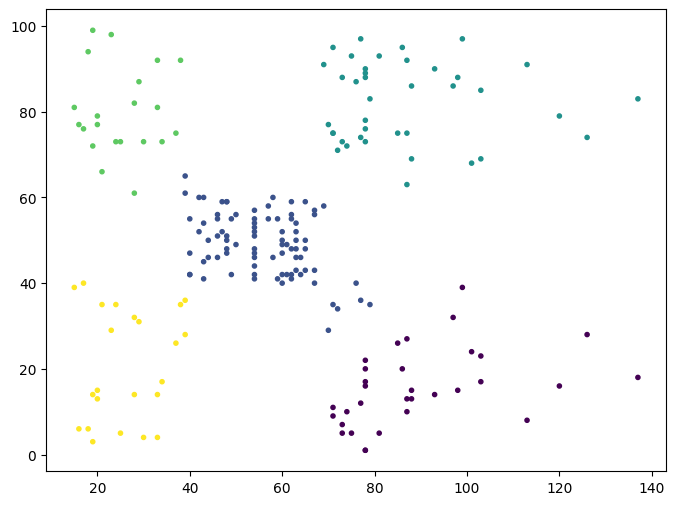

In [80]:
fig = plt.figure(figsize = (8,6))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)

#from sklearn.datasets import make_blobs
plt.scatter(malldataset["Annual Income (k$)"],malldataset["Spending Score (1-100)"],marker = '.',c = y_hc.astype(np.float64))